# 27 — Seaborn + Matplotlib (Best of both)

## Goal
Use Seaborn for high-level statistical plotting and Matplotlib for final polishing and publication control.

### What you'll learn
- `sns.set_theme()` vs Matplotlib styles
- Seaborn plots return Matplotlib axes (so you can customize)
- Common Seaborn plot types: hist/KDE, box/violin, regression
- How to control palettes consistently
- Turning Seaborn plots into report-quality figures


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
np.random.seed(42)

try:
    import seaborn as sns
    print('✅ Seaborn available:', sns.__version__)
except Exception as e:
    sns = None
    print('⚠️ Seaborn not available. Install via: pip install seaborn')
    print('Error:', e)

✅ Seaborn available: 0.13.2


## 1. Create a Statistical Dataset
We’ll create a dataset with a few segments and correlated features.


In [2]:
n = 800
df = pd.DataFrame({
    'segment': np.random.choice(['A', 'B', 'C'], size=n, p=[0.4, 0.35, 0.25]),
    'x': np.random.normal(0, 1, size=n),
})
df['y'] = 2.0 + 1.7*df['x'] + np.random.normal(0, 1.3, size=n)
df['score'] = 50 + 10*df['x'] + np.random.normal(0, 8, size=n)
df.head()

,segment,x,y,score
0,A,-0.790474,1.355978,39.228534
1,C,0.471468,4.195756,49.534349
2,B,1.882024,4.725003,74.773781
3,B,1.345420,3.196242,62.004407
4,A,1.593187,3.350165,60.736882


## 2. Set Theme and Palette
```python
sns.set_theme(style='whitegrid', context='notebook')
sns.set_palette('colorblind')
```


In [3]:
if sns is not None:
    sns.set_theme(style='whitegrid', context='notebook')
    sns.set_palette('colorblind')
    print('Theme applied')

Theme applied


## 3. Seaborn Plot → Matplotlib Polish
Seaborn returns an axes that can be styled like any Matplotlib axes.


=== SEABORN REGPLOT + MATPLOTLIB FINISH ===


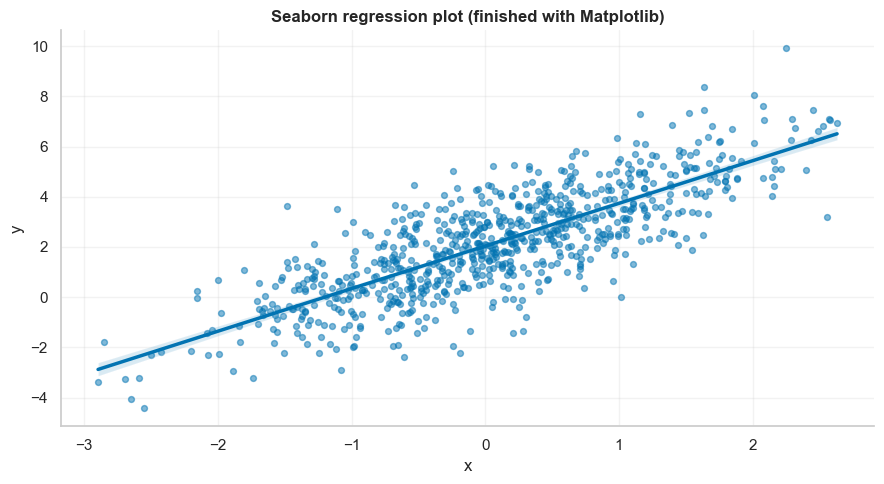

In [4]:
if sns is not None:
    print('=== SEABORN REGPLOT + MATPLOTLIB FINISH ===')
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.regplot(data=df, x='x', y='y', scatter_kws={'s': 18, 'alpha': 0.5}, line_kws={'lw': 2.5}, ax=ax)
    ax.set_title('Seaborn regression plot (finished with Matplotlib)', fontweight='bold')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.grid(True, alpha=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()
else:
    print('Skipping plot. Install seaborn.')

## 4. Distribution & Group Comparison
Common patterns:
- `histplot` / `kdeplot`
- `boxplot` / `violinplot` with hue


=== VIOLIN + STRIP OVERLAY ===


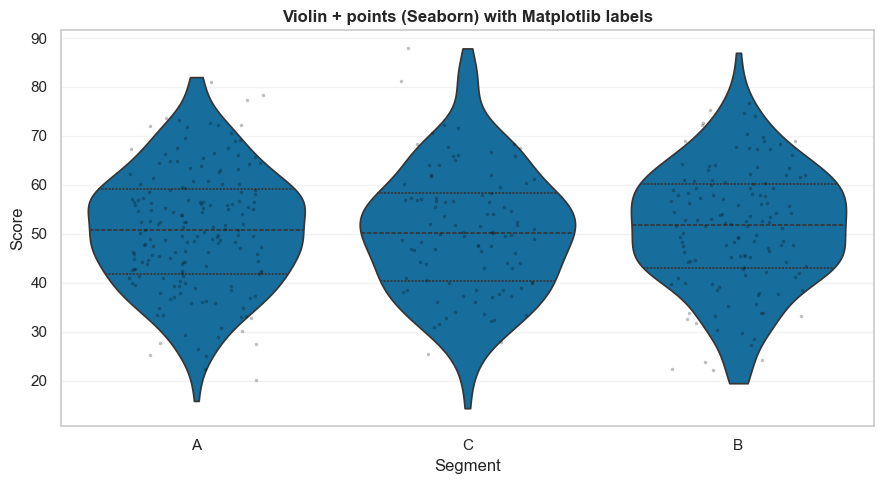

In [5]:
if sns is not None:
    print('=== VIOLIN + STRIP OVERLAY ===')
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.violinplot(data=df, x='segment', y='score', inner='quartile', cut=0, ax=ax)
    sns.stripplot(data=df.sample(400, random_state=42), x='segment', y='score',
                  color='black', size=2.5, alpha=0.25, jitter=0.25, ax=ax)
    ax.set_title('Violin + points (Seaborn) with Matplotlib labels', fontweight='bold')
    ax.set_xlabel('Segment'); ax.set_ylabel('Score')
    ax.grid(True, axis='y', alpha=0.25)
    plt.tight_layout()
    plt.show()

## Practice + Quick Reference
### Practice
1. Use `sns.histplot(..., kde=True)` and then customize tick labels with Matplotlib.
2. Build a 2×2 Seaborn dashboard and align titles/labels consistently.
3. Apply one palette consistently across multiple plots.

### Quick reference
```python
import seaborn as sns
sns.set_theme(style='whitegrid')
ax = sns.regplot(data=df, x='x', y='y')
ax.set_title('...')
```
